## Dive into Deep Learning 7.6.4 (#1-5)

In [118]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [119]:
def init_cnn(module):  #@save
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.Classifier):  #@save
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [120]:
@d2l.add_to_class(d2l.Classifier)  #@save
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


/Users/SongYoungOh/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


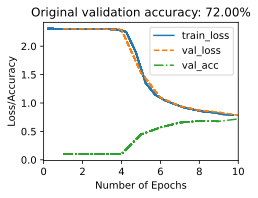

In [121]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)
acc_original = model.board.data['val_acc'][-1].y
plt.title(f'Original validation accuracy: {acc_original*100:.2f}%')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()

### 7.6.4 Exercises (#1)

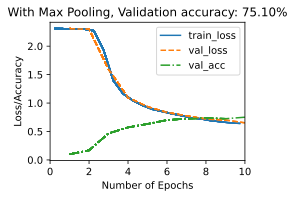

In [122]:
# Replace avg pool with max pool

class LeNet_maxpool(d2l.Classifier):  #@save
    """The LeNet-5 model with max pooling."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

model_ex1_1 = LeNet_maxpool(lr=0.1)
model_ex1_1.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model_ex1_1, data)
acc_ex1_1 = model_ex1_1.board.data['val_acc'][-1].y
plt.title(f"With Max Pooling, Validation accuracy: {acc_ex1_1*100:.2f}%")
plt.xlabel('Number of Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()

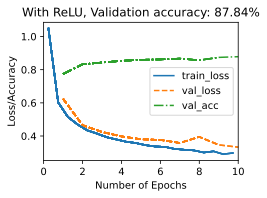

In [123]:
# Replace softmax layer with ReLU

class LeNet_ReLU(d2l.Classifier):  #@save
    """The LeNet-5 model with ReLU."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))

model_ex1_2 = LeNet_ReLU(lr=0.1)
model_ex1_2.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model_ex1_2, data)
acc_ex1_2 = model_ex1_2.board.data['val_acc'][-1].y
plt.title(f"With ReLU, Validation accuracy: {acc_ex1_2*100:.2f}%")
plt.xlabel('Number of Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()

### 7.6.4 Exercises (#2)

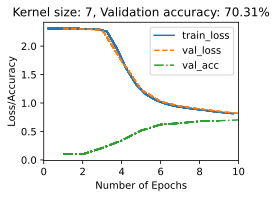

In [124]:
# Adjust the convolution window size

class LeNet_kernelsize(d2l.Classifier):  #@save
    """The LeNet-5 model with different kernel sizes."""
    def __init__(self, lr=0.1, num_classes=10, kernelsize=5):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=kernelsize, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=kernelsize), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))


model_ex2 = LeNet_kernelsize(lr=0.1, kernelsize=7)
model_ex2.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model_ex2, data)
acc_ex2 = model_ex2.board.data['val_acc'][-1].y
plt.title(f"Kernel size: 7, Validation accuracy: {acc_ex2*100:.2f}%")
plt.xlabel('Number of Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()

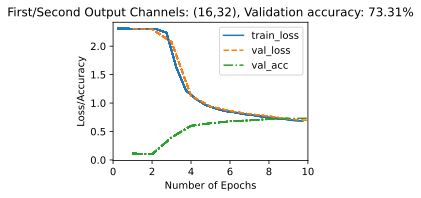

In [125]:
# Adjust the number of output channels

class LeNet_outputchannels(d2l.Classifier):  #@save
    """The LeNet-5 model with different output channels."""
    def __init__(self, lr=0.1, num_classes=10, first_outputchannels=6, second_outputchannels=16):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(first_outputchannels, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(second_outputchannels, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))


model_ex2_2 = LeNet_outputchannels(lr=0.1, first_outputchannels=12, second_outputchannels=32)
model_ex2_2.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model_ex2_2, data)
acc = model_ex2_2.board.data['val_acc'][-1].y
plt.title(f"First/Second Output Channels: (16,32), Validation accuracy: {acc*100:.2f}%")
plt.xlabel('Number of Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()

In [126]:
# Adjust the number of convolution layers
class LeNet_Conv2d_4(d2l.Classifier):  #@save
    """The LeNet-5 model with a different number of convolution layers."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

class LeNet_Conv2d_6(d2l.Classifier):  #@save
    """The LeNet-5 model with a different number of convolution layers."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

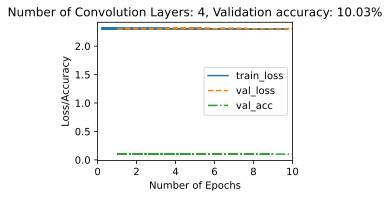

In [127]:
model_ex2_3_a = LeNet_Conv2d_4(lr=0.1)
model_ex2_3_a.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model_ex2_3_a, data)
acc_ex2_3_a = model_ex2_3_a.board.data['val_acc'][-1].y
plt.title(f"Number of Convolution Layers: 4, Validation accuracy: {acc_ex2_3_a*100:.2f}%")
plt.xlabel('Number of Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()

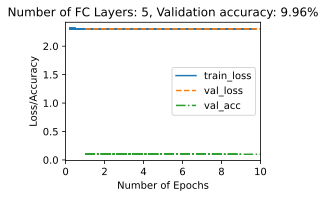

In [128]:
# Adjust the number of fully connected layers

class LeNet_fiveFC(d2l.Classifier):
    """The LeNet-5 model with five fully connected layers."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(64), nn.Sigmoid(),
            nn.LazyLinear(32), nn.Sigmoid(),
            nn.LazyLinear(num_classes)
        )

model_ex2_4 = LeNet_fiveFC(lr=0.1)
model_ex2_4.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model_ex2_4, data)
acc_ex2_4 = model_ex2_4.board.data['val_acc'][-1].y
plt.title(f"Number of FC Layers: 5, Validation accuracy: {acc_ex2_4*100:.2f}%")
plt.xlabel('Number of Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()

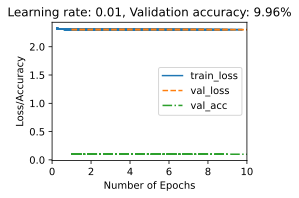

In [129]:
# Adjust the learning rate

model_ex2_5 = LeNet(lr=0.01)
model_ex2_5.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model_ex2_5, data)
acc_ex2_5 = model_ex2_5.board.data['val_acc'][-1].y
plt.title(f"Learning rate: 0.01, Validation accuracy: {acc_ex2_5*100:.2f}%")
plt.xlabel('Number of Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()

### 7.6.4 Exercises (#3)

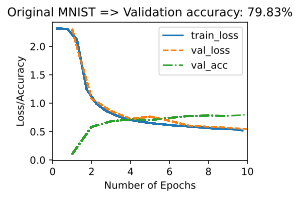

In [130]:
data_original = d2l.FashionMNIST(resize=(32, 32))
model_ex3 = LeNet(lr=0.1)
model_ex3.apply_init([next(iter(data_original.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model_ex3, data_original)
acc_ex3 = model_ex3.board.data['val_acc'][-1].y
plt.title(f"Original MNIST => Validation accuracy: {acc_ex3*100:.2f}%")
plt.xlabel('Number of Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()

In [131]:
model_ex3.layer_summary((1,1,32,32))

Conv2d output shape:	 torch.Size([1, 6, 32, 32])
Sigmoid output shape:	 torch.Size([1, 6, 32, 32])
AvgPool2d output shape:	 torch.Size([1, 6, 16, 16])
Conv2d output shape:	 torch.Size([1, 16, 12, 12])
Sigmoid output shape:	 torch.Size([1, 16, 12, 12])
AvgPool2d output shape:	 torch.Size([1, 16, 6, 6])
Flatten output shape:	 torch.Size([1, 576])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


### 7.6.4 Exercises (#4)

In [132]:
# Class of MNIST dataset
print(data.train.classes)

# Class to index mapping
print(data.train.class_to_idx)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [138]:
"""Train a model only with sneaker images."""

batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

def train_sneaker_model(net, train_iter, lr, num_epochs):
    device = d2l.try_gpu()
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)

    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, train_n = 0.0, 0.0, 0
        for X, y in train_iter:
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            
            # Filter only 'Sneaker' images
            sneaker_indices = (y == 7)
            X_sneaker, y_sneaker = X[sneaker_indices], y[sneaker_indices]
            
            if len(X_sneaker) > 0:
                l = loss(y_hat[sneaker_indices], y_sneaker)
                l.backward()
                optimizer.step()
                train_l_sum += l.item()
                train_acc_sum += (y_hat[sneaker_indices].argmax(dim=1) == y_sneaker).sum().item()
                train_n += y_sneaker.numel()
                
        net.train()
        print(f'Epoch {epoch + 1}, Loss {train_l_sum / train_n:.6f}, Train acc {train_acc_sum / train_n:.6f}')

model_ex4_1 = LeNet()
train_sneaker_model(model_ex4_1, train_iter, lr=0.1, num_epochs=10)

Epoch 1, Loss 0.000834, Train acc 0.998000
Epoch 2, Loss 0.000033, Train acc 1.000000
Epoch 3, Loss 0.000019, Train acc 1.000000
Epoch 4, Loss 0.000013, Train acc 1.000000
Epoch 5, Loss 0.000010, Train acc 1.000000
Epoch 6, Loss 0.000008, Train acc 1.000000
Epoch 7, Loss 0.000007, Train acc 1.000000
Epoch 8, Loss 0.000006, Train acc 1.000000
Epoch 9, Loss 0.000005, Train acc 1.000000
Epoch 10, Loss 0.000004, Train acc 1.000000


In [139]:
model_ex4_1.layer_summary((1,1,28,28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


In [140]:
"""Train a model only with coat images."""

# Training function
def train_coat_model(net, train_iter, lr, num_epochs):
    device = d2l.try_gpu()
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)

    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, train_n = 0.0, 0.0, 0
        for X, y in train_iter:
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            
            # Filter only 'Coat' images
            coat_indices = (y == 4)
            X_coat, y_coat = X[coat_indices], y[coat_indices]
            
            if len(X_coat) > 0:
                l = loss(y_hat[coat_indices], y_coat)
                l.backward()
                optimizer.step()
                train_l_sum += l.item()
                train_acc_sum += (y_hat[coat_indices].argmax(dim=1) == y_coat).sum().item()
                train_n += y_coat.numel()

        net.train()
        print(f'Epoch {epoch + 1}, Loss {train_l_sum / train_n:.6f}, Train acc {train_acc_sum / train_n:.6f}')

model_ex4_2 = LeNet()
train_coat_model(model_ex4_2, train_iter, lr=0.1, num_epochs=10)

Epoch 1, Loss 0.000739, Train acc 0.996667
Epoch 2, Loss 0.000031, Train acc 1.000000
Epoch 3, Loss 0.000018, Train acc 1.000000
Epoch 4, Loss 0.000012, Train acc 1.000000
Epoch 5, Loss 0.000009, Train acc 1.000000
Epoch 6, Loss 0.000008, Train acc 1.000000
Epoch 7, Loss 0.000006, Train acc 1.000000
Epoch 8, Loss 0.000005, Train acc 1.000000
Epoch 9, Loss 0.000005, Train acc 1.000000
Epoch 10, Loss 0.000004, Train acc 1.000000


In [141]:
model_ex4_2.layer_summary((1,1,28,28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


### 7.6.4 Exercises (#5)

> When we feed significantly different images into the network, the activations will also significantly different features of the images and be visualized as quite different forms. This is because the network represents unique features of the input data through its layers and neurons.